In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. About the dataset

In [11]:
data = pd.read_csv('top50.csv', encoding = "ISO-8859-1")

In [12]:
data.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [13]:
# Delete Extra column
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [14]:
data.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [15]:
data.shape

(50, 13)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
Track.Name          50 non-null object
Artist.Name         50 non-null object
Genre               50 non-null object
Beats.Per.Minute    50 non-null int64
Energy              50 non-null int64
Danceability        50 non-null int64
Loudness..dB..      50 non-null int64
Liveness            50 non-null int64
Valence.            50 non-null int64
Length.             50 non-null int64
Acousticness..      50 non-null int64
Speechiness.        50 non-null int64
Popularity          50 non-null int64
dtypes: int64(10), object(3)
memory usage: 5.2+ KB


In [17]:
data.columns

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [18]:
data.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


- Track.Name: Name of the Track
- Artist.Name: Name of the Artist
- Genre: the genre of the track
- Beats.Per.Minute: The tempo of the song.
- Energy: The energy of a song - the higher the value, the more energtic. song
- Danceability: The higher the value, the easier it is to dance to this song.
- Loudness..dB.: .The higher the value, the louder the song.
- Liveness: The higher the value, the more likely the song is a live recording.
- Valence.: The higher the value, the more positive mood for the song.
- Length.:The duration of the song.
- Acousticness.: .The higher the value the more acoustic the song is.
- Speechiness: The higher the value the more spoken word the song contains.
- Popularity: The higher the value the more popular the song is.

In [19]:
### Predictor set
x = data[['Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.', 'Acousticness..', 'Speechiness.']]
### Target variable
y = data[['Popularity']]
### Define info variables
info = data[['Track.Name', 'Artist.Name', 'Genre']]

### 2. EDA

#### 2.1 Counts for Genre of Top 50 songs

Text(0.5, 0.98, 'Counts for Genre of Top 50 songs')

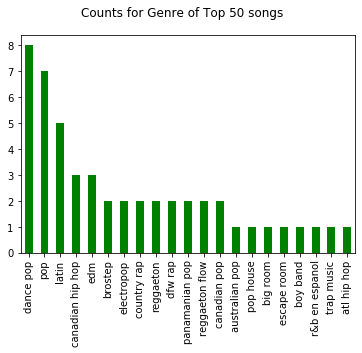

In [139]:
data['Genre'].value_counts().plot.bar(color ='green')
plt.suptitle('Counts for Genre of Top 50 songs')

Text(0.5, 0.98, 'Counts for Genre of Top 50 songs')

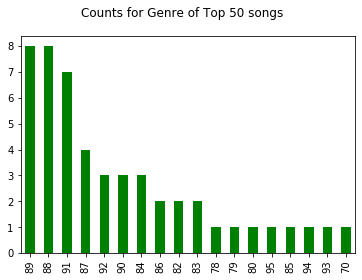

In [140]:
data['Popularity'].value_counts().plot.bar(color ='green')
plt.suptitle('Counts for Genre of Top 50 songs')

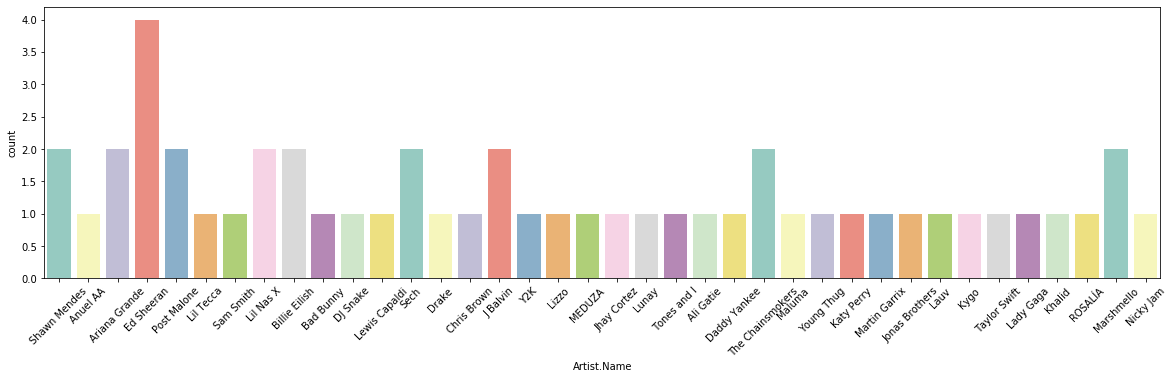

In [54]:
plt.figure(figsize=(20,5))
fig = sns.countplot(data['Artist.Name'], orient= "v", palette = "Set3")
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show()

#### 2.2 Correlations

Text(0.5, 0.98, 'Correlation for Top 50 songs')

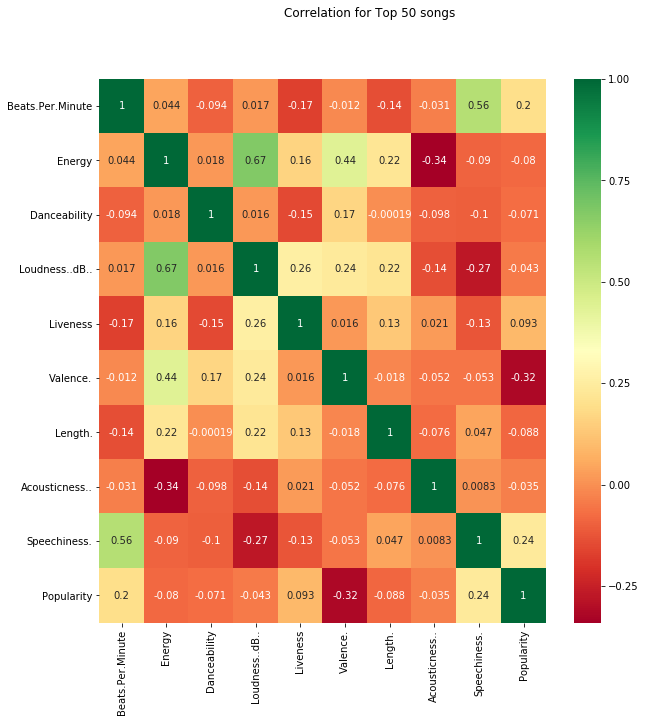

In [69]:
plt.figure(figsize=(10,10))
corr=data.corr()
sns.heatmap(corr, annot=True, cmap ='RdYlGn')
plt.suptitle('Correlation for Top 50 songs')

Only Loudness with Energy have a high positive correlation, but not that significant (most of the academic papers consider a correlation higher than 0.7 as significant). Because the lackness of strong monotonous correlations, I believe that the creation of linear predictive models becomes unnecessary.

### 3. Predictive Analysis 

In [88]:
# define the predictors set
x = data[['Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.', 'Acousticness..', 'Speechiness.']]
# define the target variable
y = data[['Popularity']]
# Define info variables 
info = data[['Track.Name', 'Artist.Name', 'Genre']]


Is it possible to predict Popularity based on X features?

Given the small dataset, I will implement a Cross-Validation 10 Folds using sklearn for our models creation. The predictive models chosen are:

- SVM (Support Vector Machine)
- RF (Random Forest)
- KNN (K Nearest Neighbours)
Because of correlation analysis in EDA, I will not create any Linear model as explained before.

The model developments has the follow pipeline:

- Apply CV 10 Folds in our data
- Standardize our train set and then our test set based on previous transformation
- Fit our models with defaults hyperparameters
- Predict with our models and get the MSE metric  

--The model chosen will be the one with the best average prediction metric - Mean Square Error(MSE) over the cross validation process.

In [124]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Prediction
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
# Clustering
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import recall_score

In [110]:
X = data.drop(['Popularity','Genre','Track.Name','Artist.Name'],axis =1)
y = data['Popularity'].values

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)
y_train_01=[1 if each > 85 else 0 for each in y_train]
y_test_01=[1 if each > 85 else 0 for each in y_test]

In [125]:
#create a svm classifier
svm = SVC(kernel='linear')
#train the model using the training sets
svm.fit(X_train, y_train_01)
#predict the response for test dataset
y_pred_svm = svm.predict(X_test)
print("Accuracy of the SVM model is:", metrics.accuracy_score(y_test_01,y_pred_svm))

Accuracy of the SVM model is: 0.7


In [155]:
acc= accuracy_score(y_test_01, y_pred_svm)
pre= precision_score(y_test_01, y_pred_svm)
rec= recall_score(y_test_01, y_pred_svm)
print("Accuracy LR:",accuracy_score(y_test_01, y_pred_svm))
print("Precision Score LR:", precision_score(y_test_01, y_pred_svm))
print("Recall Score LR:", recall_score(y_test_01, y_pred_svm))

Accuracy LR: 0.7
Precision Score LR: 0.8571428571428571
Recall Score LR: 0.75


In [133]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train_01)
y_pred_knn = knn.predict(X_test)
print("Accuracy of the KNN model when k = 2 is:",metrics.accuracy_score(y_test_01, y_pred_knn))

Accuracy of the KNN model when k = 2 is: 0.6


In [156]:
acc = accuracy_score(y_test_01, y_pred_knn)
pre = precision_score(y_test_01, y_pred_knn)
rec = recall_score(y_test_01, y_pred_knn)
print("Accuracy LR:",accuracy_score(y_test_01, y_pred_knn))
print("Precision Score LR:", precision_score(y_test_01, y_pred_knn))
print("Recall Score LR:", recall_score(y_test_01, y_pred_knn))

Accuracy LR: 0.6
Precision Score LR: 1.0
Recall Score LR: 0.5


In [137]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train_01)
y_pred_dct = decision_tree.predict(X_test)
print("Accuracy of the decision tree model is:",metrics.accuracy_score(y_test_01, y_pred_dct))

Accuracy of the decision tree model is: 0.6


In [157]:
acc = accuracy_score(y_test_01, y_pred_dct)
pre = precision_score(y_test_01, y_pred_dct)
rec = recall_score(y_test_01, y_pred_dct)
print("Accuracy LR:",accuracy_score(y_test_01, y_pred_dct))
print("Precision Score LR:", precision_score(y_test_01, y_pred_dct))
print("Recall Score LR:", recall_score(y_test_01, y_pred_dct))

Accuracy LR: 0.6
Precision Score LR: 0.75
Recall Score LR: 0.75


In [153]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

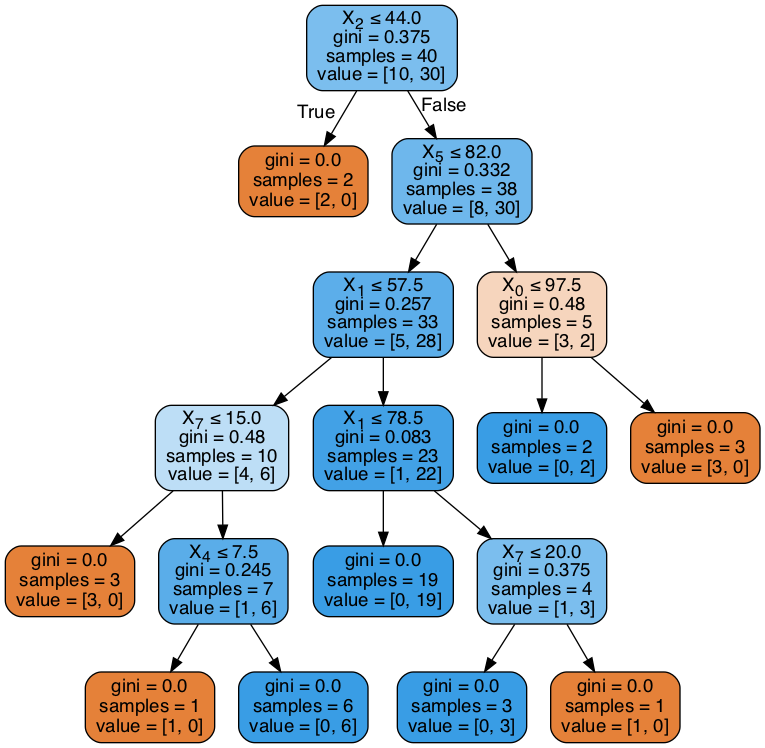

In [158]:
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [161]:
l_regression = LogisticRegression(random_state =0)
l_regression.fit(X_train, y_train_01)
y_pred_lr = l_regression.predict(X_test)
print("Accuracy of the logistic regression model is:",metrics.accuracy_score(y_test_01, y_pred_lr))

Accuracy of the logistic regression model is: 0.8


/Users/lalaaasunday/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [162]:
acc = accuracy_score(y_test_01, y_pred_lr)
pre = precision_score(y_test_01, y_pred_lr)
rec = recall_score(y_test_01, y_pred_lr)
print("Accuracy LR:",accuracy_score(y_test_01, y_pred_lr))
print("Precision Score LR:", precision_score(y_test_01, y_pred_lr))
print("Recall Score LR:", recall_score(y_test_01, y_pred_lr))

Accuracy LR: 0.8
Precision Score LR: 0.875
Recall Score LR: 0.875


#### Clustering analysis

Is it possible to clusterize our data using those 9 numeric features and get info about genre and popularity? Let's find out using PCA with KNN and tSNE.

#### Principal Components Analysis with K Means in a 2D plot
The pipeline for this:

- Create a PCA for 2 components (2D plot)
- Analyze explained ratio
- Create a K Means using silhouette analysis to find optimal K in a range from 2 to N clusters, where N means the maximum number of genres in our dataset
- Analyze the results (using genre categorical column and popularity numerical column)

#### Scale our features before any PCA analysis


In [89]:
# Scale our x data
ss = StandardScaler()
# Fit and transform our data using StandardScaler
x_ss = ss.fit_transform(x)

#### Model Development - PCA with 2 components

In [92]:
# Create a PC space with 2 components only
pca = PCA(n_components=2)
# Fit and Transform X to PC dimension
pc = pca.fit_transform(x_ss)

In [95]:
# Print Explained Variance Ratio
print('PC1 explained %.2f ratio and PC2 explained %.2f ratio of total variance.' %
      (pca.explained_variance_ratio_[0], pca.explained_variance_ratio_[1]))

PC1 explained 0.25 ratio and PC2 explained 0.18 ratio of total variance.


##### Model Development - KMeans in 2D

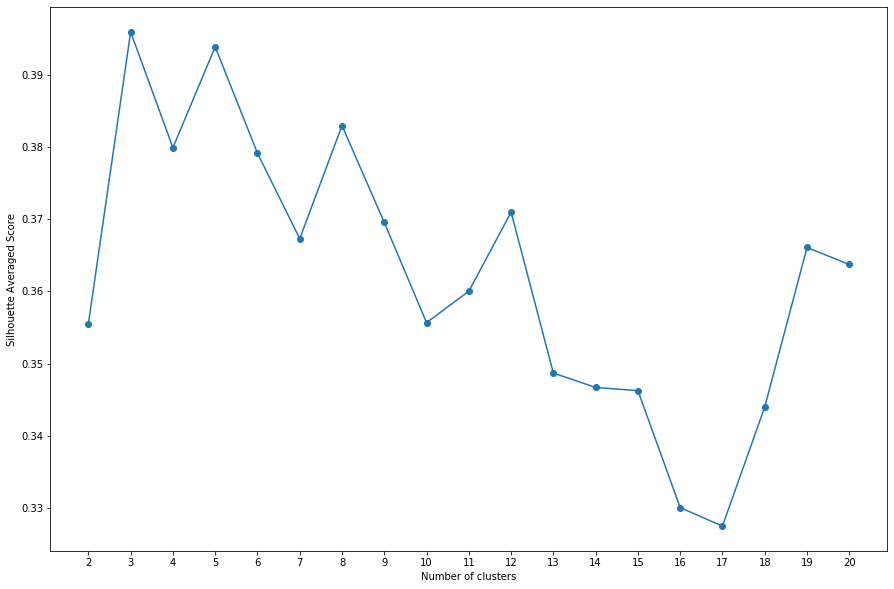

In [98]:
# Define our range of clusters based on genre size
n_clusters = range(2, len(info.Genre.unique())) 
# Create a list to append silhouette_avg values for each K to plot
silhouette_avg = []

# Loop to find optimal K
for K in n_clusters:
    # Create KNN model
    km = KMeans(n_clusters=K, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=1206)
    # Fit and predict with K clusters using Principal Components
    pred = km.fit_predict(pc)
    # Calculate silhouette score
    silhouette_avg.append(silhouette_score(pc, pred))

# Plot the results to define our optimal K
plt.figure(figsize=(15,10))
plt.plot(n_clusters, silhouette_avg, marker='o');
plt.xticks(n_clusters);
plt.xlabel('Number of clusters');
plt.ylabel('Silhouette Averaged Score');

In [99]:
# Create our KMeans model using optimal K
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=1206)
# Fit and predict with 3 clusters using Principal Components
pred = km.fit_predict(pc)

In [101]:
# Create a Dataframe for PC with target var
df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2'])
# Create a column for our clusters (KMeans prediction)
df['Clusters']=pd.Series(pred)
# Join with target info/popularity dataset
df = pd.concat([df, y, info], axis = 1)
# A sample of our new dataframe
df.head(3)

,PC1,PC2,Clusters,Popularity,Track.Name,Artist.Name,Genre
0,-0.154051,-0.310381,1,79,Señorita,Shawn Mendes,canadian pop
1,-2.084589,0.189137,1,92,China,Anuel AA,reggaeton flow
2,0.001561,4.102778,0,85,boyfriend (with Social House),Ariana Grande,dance pop


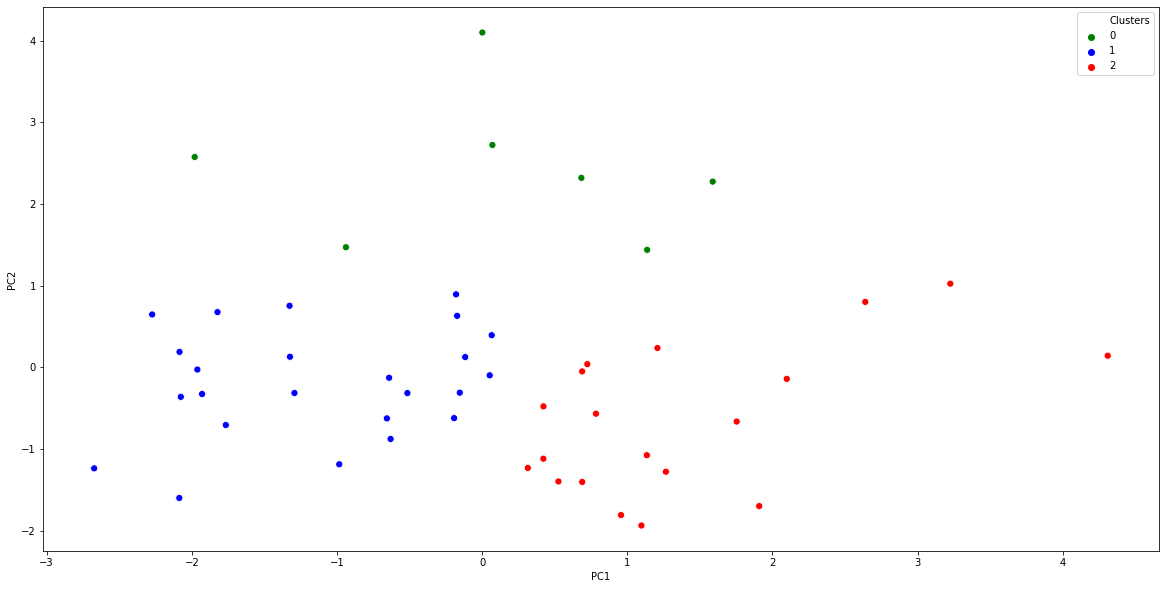

In [103]:
# Plot using seaborn our clusterization
plt.figure(figsize=(20,10));
sns.scatterplot(x="PC1", y="PC2", hue="Clusters", data=df, palette=['green','blue','red'], s= 50);

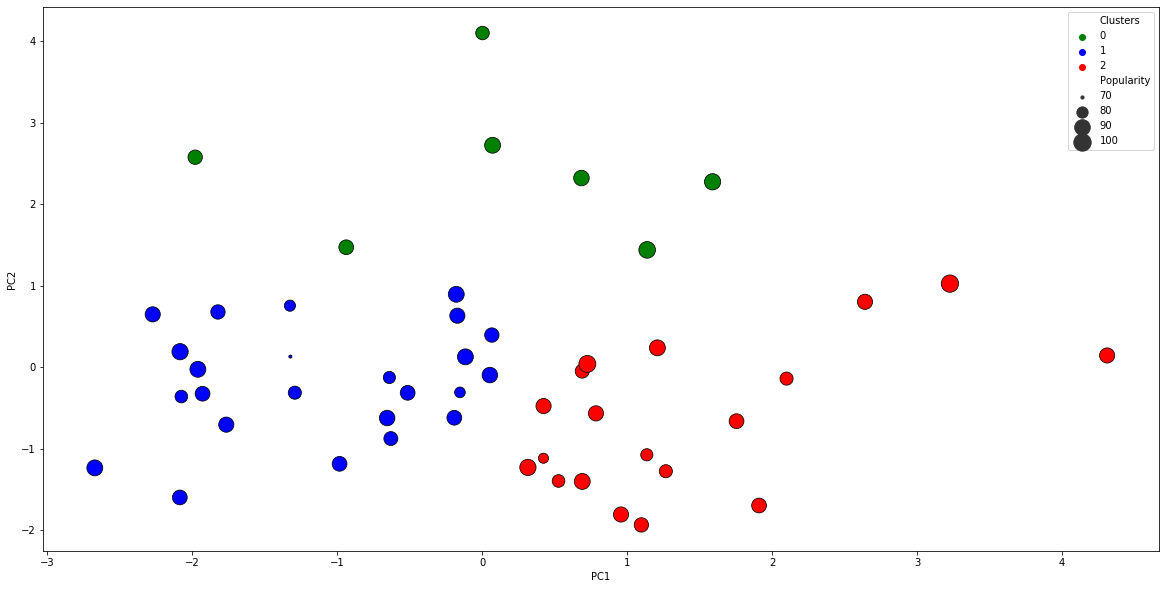

In [105]:
# Plot using seaborn our clusterization and differentiate the population by size
plt.figure(figsize=(20,10));
sns.scatterplot(x="PC1", y="PC2", hue="Clusters", data=df, palette=['green','blue','red'], size="Popularity", sizes=(10, 300), edgecolor="black");

##### Again popularity has not able to divide into different clusters, having mixed values.